In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#根据题意输入数据
#导入输入非线性输入值x0²，x1x2，x1²
X = np.array([[1,0,0,0,0,0],
              [1,0,1,0,0,1],
              [1,1,0,1,0,0],
              [1,1,1,1,1,1]])
#标签
#针对异或输入标签
Y = np.array([-1,1,1,-1])

#权值取6个范围[-1,1]的随机数
W = (np.random.random(6)-0.5)*2
print(W)
     
#设置学习率
lr = 0.11

#迭代次数
n = 0
#神经网络输出,初始值设为0
O = 0

#权值更新的函数：
#4行3列的X矩阵和3行1列的W矩阵相乘得到4行1列的矩阵
#4行3列转置成3行4列的X矩阵和4行1列（Y-0）矩阵相乘得到3行1列的矩阵
#X.shape[0]，由于X是4行3列的矩阵，shape.[0]相当于得到了行数
#/int（X.shape[0]）相当于对于（X.T.dot(Y-0)）进行一个平均
def update():
    global X,Y,W,lr,n
    n+=1
    O = np.dot(X,W.T) # shape:(3,1)  #线性神经网络Y=X，此处唯一和感知器不一样的地方
    W_C = lr*((Y-O.T).dot(X))/int(X.shape[0])
    W = W + W_C

[-0.21290606 -0.20539556  0.62011754 -0.056164    0.03068916  0.06258033]


### 自定义calculate函数的推导
 - x0w0+x1w1+x2w2+x1²w3+x1x2w4+x2²w5=0
 - 定义y=x2，x0位偏置值=1
 - 得：x0w0+x1w1+yw2+x1²w3+x1yw4+y²w5
 - 得：w5y²+y（w2+xw4）+w0+xw1+x²w3=0
 - 通过2元一次求解公式：y=[-b±根号（b²-4ac）]/2a
 - 得：a=w5，b=w2+xw4，c=w0+xw1+x²w3

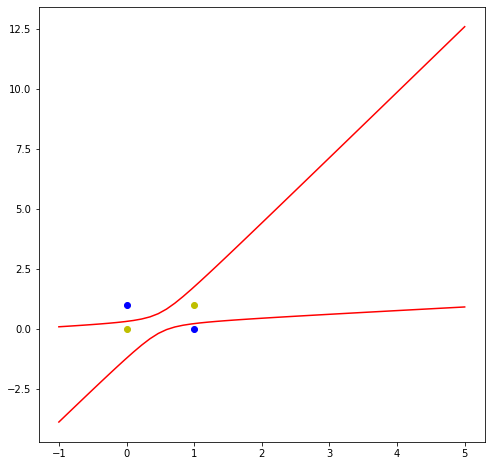

In [27]:
for i in range(100000):
    update()#更新权值
    
#绘图在for循环里面，权值每改变一次就画一次图
#正样本
x1 = [0,1]
y1 = [1,0]
#负样本
x2 = [0,1]
y2 = [0,1]

def calculate(x,root):
    a = W[5]
    b = W[2]+x*W[4]
    c = W[0]+x*W[1]+x*x*W[3]
    if root == 1:
        return (-b+np.sqrt(b*b-4*a*c))/2*a
    if root == 2:
        return (-b-np.sqrt(b*b-4*a*c))/2*a
    

xdata = np.linspace(-1,5)

plt.figure(figsize=(8,8))
#修改绘图，输入函数以及函数的第1个根和第2个根
plt.plot(xdata,calculate(xdata,1),'r')
plt.plot(xdata,calculate(xdata,2),'r')

plt.scatter(x1,y1,c='b')
plt.scatter(x2,y2,c='y')
plt.show()   


### 对线性神经网络添加非线性输入，使等效的输入维度变大，从而解决异或问题

In [22]:
O = np.dot(X,W.T)
print(O)

[-1.  1.  1. -1.]
